In [1]:
# Import pandas into the environment
import pandas as pd


In [4]:
# Import marketing.csv 
marketing = pd.read_csv('marketing.csv')
# Print the first five rows of the DataFrame
print(marketing.head())
# Print the statistics of all columns
print(marketing.describe())
# Check column data types and non-missing values
print(marketing.info())


      user_id date_served  ... subscribing_channel is_retained
0  a100000029      1/1/18  ...           House Ads        True
1  a100000030      1/1/18  ...           House Ads        True
2  a100000031      1/1/18  ...           House Ads        True
3  a100000032      1/1/18  ...           House Ads        True
4  a100000033      1/1/18  ...           House Ads        True

[5 rows x 12 columns]
           user_id date_served  ... subscribing_channel is_retained
count        10037       10021  ...                1856        1856
unique        7309          31  ...                   5           2
top     a100000882     1/15/18  ...           Instagram        True
freq            12         789  ...                 600        1279

[4 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              100

In [5]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [6]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool


## Adding new columns
Adding new columns that derive information from existing data or based on domain knowledge is known as Feature Engineering. Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis.

One of the most critical skills a data scientist needs to learn is how to identify opportunities for feature engineering.

`channel_code:` represents the numeric value of the subscribing channel
`is_correct_lang:` conveys whether the ad was shown to the user in their preferred language

In [7]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

## Date columns
Currently, the date columns in the marketing DataFrame are being incorrectly read as objects. 

In [8]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv with date columns
marketing = pd.read_csv(r'marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

## Daily marketing reach by channel

In [9]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


## Visualizing daily marketing reach
In the previous, we created a daily_subscribers DataFrame, which contained the number of users who subscribed each day. While this was a great first step, it is challenging to interpret daily trends by looking at a table. To make it easier for you and your business stakeholders to notice subscriber trends, you will visualize your results using a line plot.

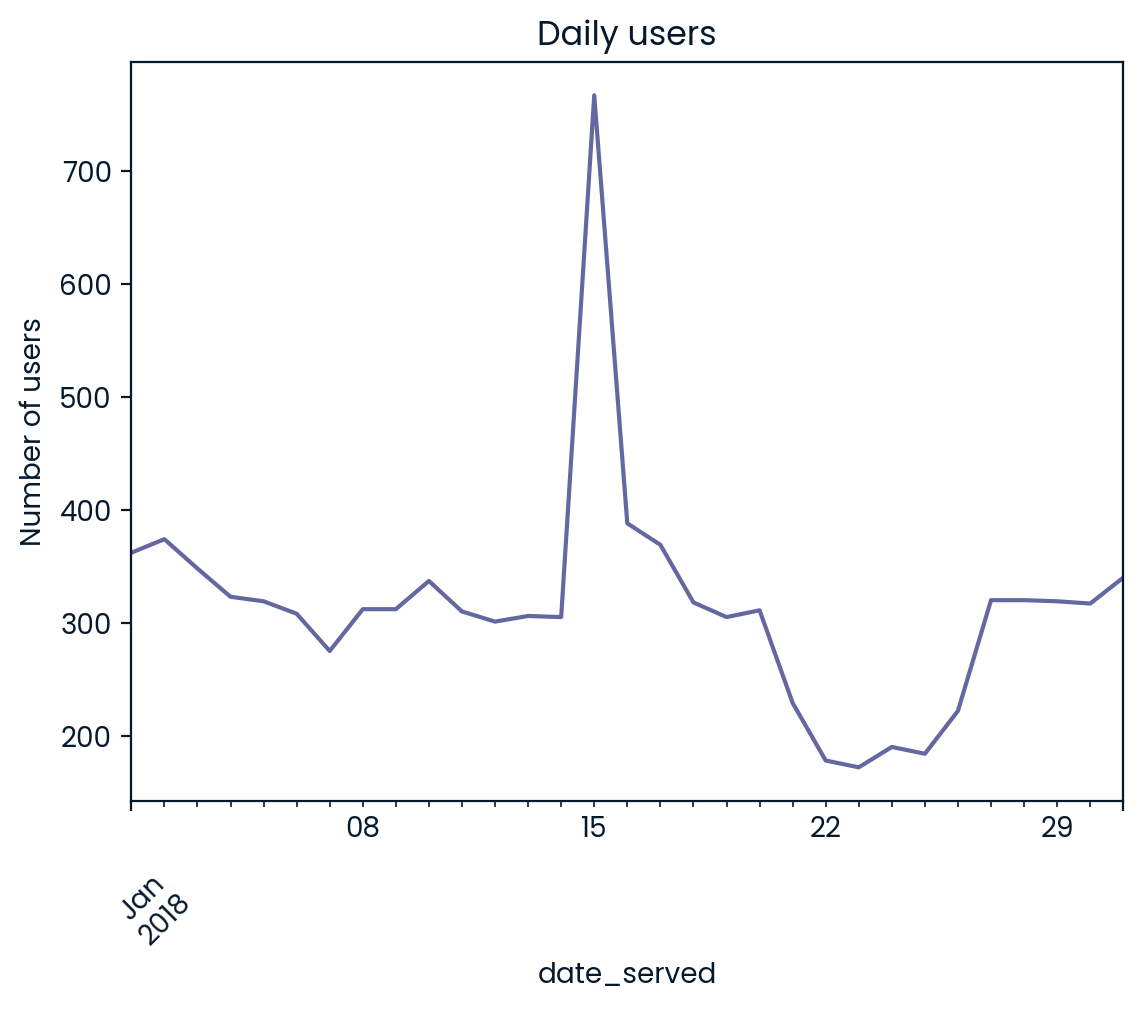

In [11]:
import matplotlib.pyplot as plt


# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()